# Kaggle : Mercari Price Suggestion Challenge
## Advanced Data Mining Final Presentation
### 20176005 Jegyeong Kim

In [6]:
from scipy import sparse
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDRegressor
import lightgbm as lgb
import time

In [36]:
path = 'C:\\Users\\Rainbow\\Desktop\\adm\\stacknet'

X_train = sparse.load_npz(path+ "X_train_02.npz")
X_test = sparse.load_npz(path+"X_test_02.npz")
y_train = sparse.load_npz(path+"y_train_02.npz")

In [44]:
yy = pd.read_csv(path+'train.tsv', sep='\t')
yy = yy[yy['price']!=0]
yy = yy[(yy['price']<1200) | (yy['price'].isnull())]
y = np.log1p(yy['price'])

In [37]:
X_train

<1481555x50433 sparse matrix of type '<class 'numpy.float64'>'
	with 39840405 stored elements in Compressed Sparse Row format>

In [35]:
len(y)

1481555

### Lidge + 2 lightGBM 사용

In [45]:
start_time = time.time()

model = Ridge(alpha=.5, copy_X=True, fit_intercept=True, max_iter=100,
  normalize=False, random_state=101, solver='auto', tol=0.01)
model.fit(X_train, y)
print('[{}] Train ridge completed'.format(time.time() - start_time))
predsR = model.predict(X=X_test)
print('[{}] Predict ridge completed'.format(time.time() - start_time))

train_X, valid_X, train_y, valid_y = train_test_split(X_train, y, test_size = 0.15, random_state = 144) 
d_train = lgb.Dataset(train_X, label=train_y, max_bin=8192)
d_valid = lgb.Dataset(valid_X, label=valid_y, max_bin=8192)
watchlist = [d_train, d_valid]

params = {
    'learning_rate': 0.65,
    'application': 'regression',
    'max_depth': 3,
    'num_leaves': 60,
    'verbosity': -1,
    'metric': 'RMSE',
    'data_random_seed': 1,
    'bagging_fraction': 0.5,
    'nthread': 4
}

params2 = {
    'learning_rate': 0.85,
    'application': 'regression',
    'max_depth': 3,
    'num_leaves': 140,
    'verbosity': -1,
    'metric': 'RMSE',
    'data_random_seed': 2,
    'bagging_fraction': 1,
    'nthread': 4
}

model = lgb.train(params, train_set=d_train, num_boost_round=7500, valid_sets=watchlist, \
early_stopping_rounds=1000, verbose_eval=1000) 
predsL = model.predict(X_test)

print('[{}] Predict lgb 1 completed.'.format(time.time() - start_time))



[39.445828914642334] Train ridge completed
[39.508997201919556] Predict ridge completed


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))


Training until validation scores don't improve for 1000 rounds.
[1000]	training's rmse: 0.461695	valid_1's rmse: 0.472356
[2000]	training's rmse: 0.44094	valid_1's rmse: 0.459016
[3000]	training's rmse: 0.429201	valid_1's rmse: 0.453419
[4000]	training's rmse: 0.421009	valid_1's rmse: 0.450432
[5000]	training's rmse: 0.413895	valid_1's rmse: 0.448697
[6000]	training's rmse: 0.407583	valid_1's rmse: 0.447329
[7000]	training's rmse: 0.402089	valid_1's rmse: 0.446538
[1681.050125837326] Predict lgb 1 completed.


In [46]:
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X_train, y, test_size = 0.1, random_state = 101) 
d_train2 = lgb.Dataset(train_X2, label=train_y2, max_bin=8192)
d_valid2 = lgb.Dataset(valid_X2, label=valid_y2, max_bin=8192)
watchlist2 = [d_train2, d_valid2]

model = lgb.train(params2, train_set=d_train2, num_boost_round=5000, valid_sets=watchlist2, \
early_stopping_rounds=500, verbose_eval=500) 
predsL2 = model.predict(X_test)

print('[{}] Predict lgb 2 completed.'.format(time.time() - start_time))

preds = predsR*0.3 + predsL*0.35 + predsL2*0.35

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))


Training until validation scores don't improve for 500 rounds.
[500]	training's rmse: 0.478762	valid_1's rmse: 0.484418
[1000]	training's rmse: 0.458376	valid_1's rmse: 0.469107
[1500]	training's rmse: 0.447013	valid_1's rmse: 0.462862
[2000]	training's rmse: 0.439238	valid_1's rmse: 0.459668
[2500]	training's rmse: 0.432662	valid_1's rmse: 0.456752
[3000]	training's rmse: 0.4277	valid_1's rmse: 0.455259
[3500]	training's rmse: 0.422908	valid_1's rmse: 0.453831
[4000]	training's rmse: 0.418689	valid_1's rmse: 0.453044
[4500]	training's rmse: 0.414836	valid_1's rmse: 0.452504
[5000]	training's rmse: 0.410991	valid_1's rmse: 0.451826
[2862.904500246048] Predict lgb 2 completed.


In [10]:
test = pd.read_csv('C:\\Users\\Rainbow\\Desktop\\adm\\'+'test.tsv', sep='\t')

In [12]:
submission: pd.DataFrame = test[['test_id']]

In [8]:
path = 'C:\\Users\\Rainbow\\Desktop\\adm\\stacknet'
t = pd.read_csv(path+'\\pred_stack_true.csv')

In [16]:
submission['price'] = np.expm1(t)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
submission['price'].iloc[693358] = 16

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
submission.to_csv(path+'\\stacking.csv', index=False)

In [49]:
submission['price'] = np.expm1(preds)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
submission.to_csv(path+'submission_03.csv', index=False)

In [4]:
from IPython.display import Image
path = 'C:\\Users\\Rainbow\\Desktop\\adm\\'

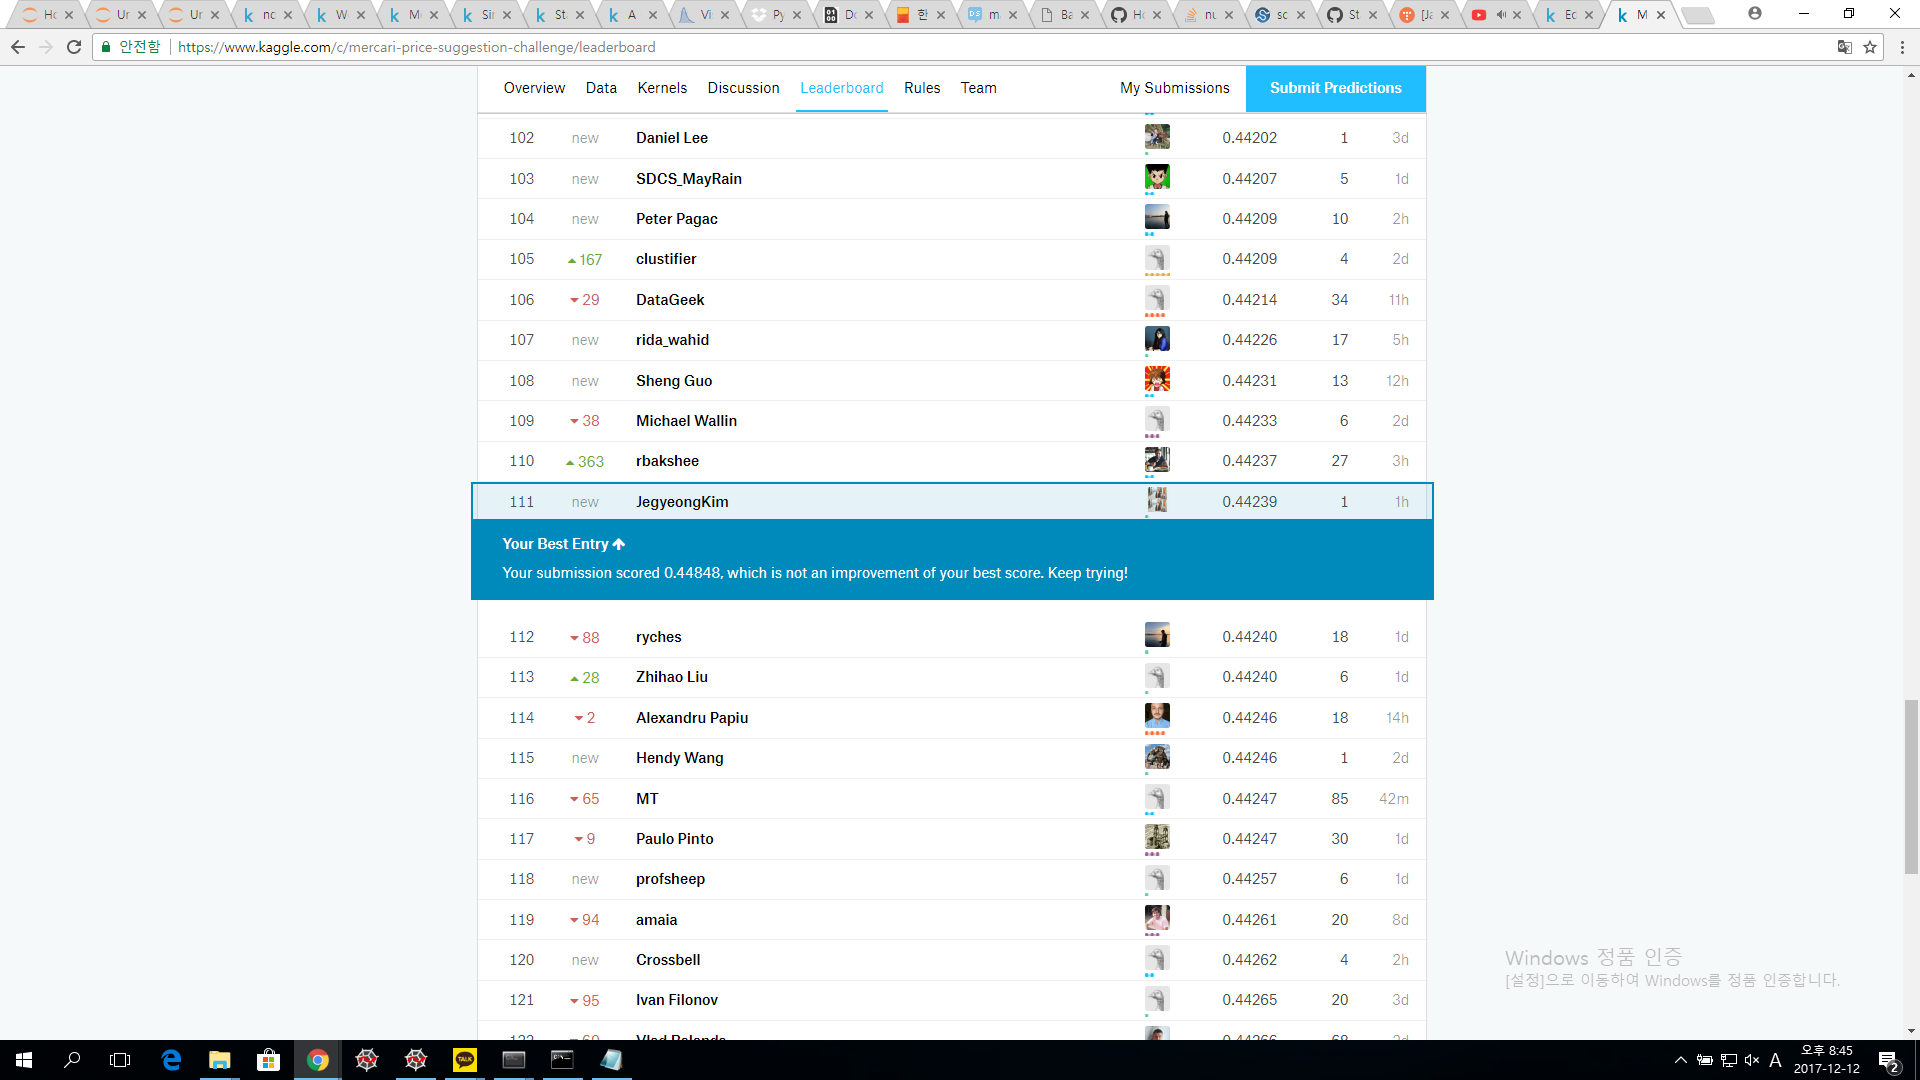

In [5]:
Image(path+'kaggle.png')